### Importing packages:

In [11]:
import pandas as pd
import scipy as sp
import math
import matplotlib.pyplot as plt
import cmasher as cmr
from itertools import combinations
from collections import Counter
import seaborn as sns

### Downloading database from the website:

In [12]:
df = pd.read_csv('http://www.multipasko.pl/wyniki-csv.php?f=lotto-sortowane', sep = ';')

### Reducing the number of rows to the latest 5000:

In [13]:
count_row = df.shape[0]
n = count_row - 5000

In [14]:
df1 = df.sort_values(['Rok', 'Miesiac', 'Dzien'], ascending=[False, False, False])

In [15]:
df2 = df1.head(-n)

In [16]:
df3 = df2.drop(['Numer', 'Dzien', 'Miesiac', 'Rok'], axis = 1)

### Calculating the number of P and N for donut chart:

In [17]:
even_uneven_values_dict = {
    "u0e6": 0,
    "u1e5": 0,
    "u2e4": 0,
    "u3e3": 0,
    "u4e2": 0,
    "u5e1": 0,
    "u6e0": 0
}



def check_even_uneven(a_tuple, a_dict):
    my_dict = a_dict.copy()
    even = 0
    uneven = 0
    
    for i in range(6):
        if a_tuple[i] % 2 == 0:
            even += 1
        else:
            uneven +=1
            
    if uneven == 0 and even == 6:
        my_dict["u0e6"] += 1
    elif uneven == 1 and even == 5:
        my_dict["u1e5"] += 1
    elif uneven == 2 and even == 4:
        my_dict["u2e4"] += 1
    elif uneven == 3 and even == 3:
        my_dict["u3e3"] += 1
    elif uneven == 4 and even == 2:
        my_dict["u4e2"] += 1
    elif uneven == 5 and even == 1:
        my_dict["u5e1"] += 1
    else:
        my_dict["u6e0"] += 1
        
    return my_dict

In [18]:
for row in df3.itertuples(index = False):
    even_uneven_values_dict = check_even_uneven(row, even_uneven_values_dict)

In [19]:
values = []

for i in even_uneven_values_dict.items():
    for value in i:
        if isinstance(value, int):
            values.append(value)

### Data for bar chart:

In [20]:
combinations_list = []
for row in df3.itertuples(index = False):
    generated = combinations(row, 2)
    for pair in generated:
        combinations_list.append(pair)
most_common_combinations0 = Counter(combinations_list)




def how_many_bars(counterick):
    
    how_many = 20
    result = []
    while(True):
        first_option = list(counterick.most_common(how_many))
        second_option = list(counterick.most_common(how_many + 1))
        if first_option[-1][1] == second_option[-1][1]:
            how_many += 1
        else:
            result = first_option
            break
    return result



most_common_combinations1 = how_many_bars(most_common_combinations0)
keys, values0 = zip(*most_common_combinations1)

keys1 = [", ".join(map(str, key)) for key in keys]

### Setting the appropriate color for the same bar values: 

In [21]:
def colorchanger(values, color_palette_hex):
    tmp = color_palette_hex.copy()
    for i in range(len(values)-1):
        if values[i] == values[i+1]:
            tmp[i+1] = tmp[i]
    return tmp

### Expected value:

In [22]:
def sum_a(a_dict):
    result = 0
    keys = a_dict.keys()
    tmp = len(keys)
    for key in keys:
        result += (a_dict[key]) * (1/tmp)
    return result

y = sum_a(most_common_combinations0)
y2 = round(y,2)

-------------------------------------------------------------------------------------------------------------------------------

In [23]:
keys_1, keys_2 = zip(*keys)

### Plots:

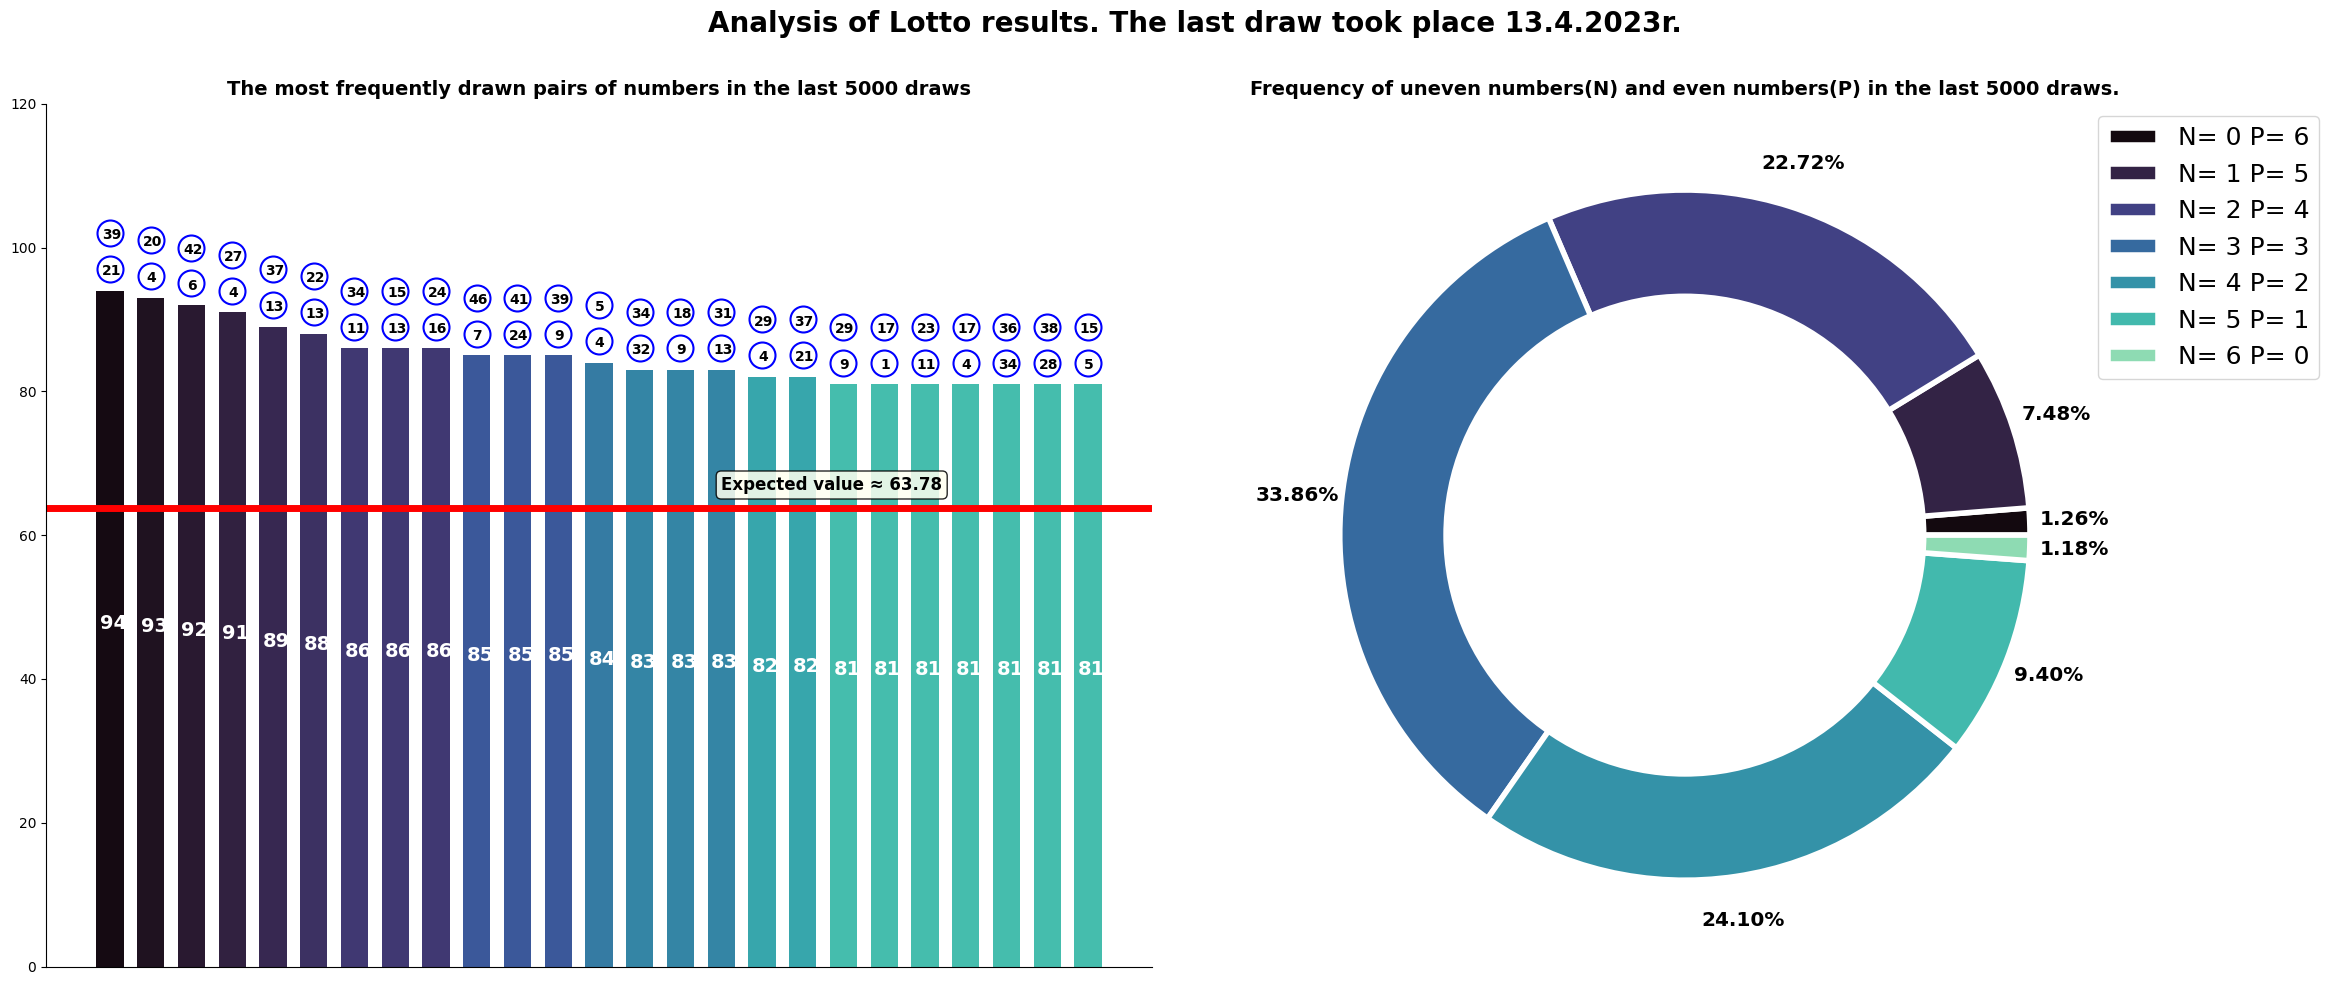

In [29]:
fig,ax = plt.subplots(1,2, figsize=(24,10)) 



plt.subplot(121)

values2 = list(values0)

color3 = sns.color_palette("mako", len(keys)).as_hex()
color4 = colorchanger(values2, color3)


colors2 = cmr.take_cmap_colors('cividis', len(keys), return_fmt='hex')
x = [i*3 for i in range(1, len(values0)+1)]





bars = plt.bar(x, values0, width = 2, color = color4, align = 'edge')
plt.title("The most frequently drawn pairs of numbers in the last 5000 draws",  fontsize = 14, fontweight = 'bold')

plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.ylim([0, 120])

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

plt.axhline(y=sum_a(most_common_combinations0), color='r', linestyle='-', linewidth=5)
plt.text(49, y + 2.5, f'Expected value \u2248 {y2}', color = 'black', fontweight='bold', fontsize = 12,
         bbox=dict(facecolor='ivory', edgecolor='black', boxstyle='round',alpha=0.85))





for i in range(len(x)):
    
    if 0 <= keys_1[i] < 10:
        plt.scatter(x[i]+1, values2[i] + 3, s = 350, edgecolors = "b", linewidths = 1.5, color = 'white')
        plt.text(x[i]+0.7, values2[i]+2.15, keys_1[i], color = 'black', fontweight='bold')
        
    else:
        plt.scatter(x[i]+1, values2[i] + 3, s = 350, edgecolors = "b", linewidths = 1.5, color = 'white')
        plt.text(x[i]+0.4, values2[i]+2.15, keys_1[i], color = 'black', fontweight='bold')
        

for j in range(len(x)):
    if 0 <= keys_2[j] < 10:
        plt.scatter(x[j]+1, values2[j] + 8, s = 350, edgecolors = "b", linewidths = 1.5, color = 'white')
        plt.text(x[j]+0.7, values2[j]+7.15, keys_2[j], color = 'black', fontweight='bold')
        
    else:
        plt.scatter(x[j]+1, values2[j] + 8, s = 350, edgecolors = "b", linewidths = 1.5, color = 'white')
        plt.text(x[j]+0.4, values2[j]+7.15, keys_2[j], color = 'black', fontweight='bold')
        
        
        


for i in range(len(x)):
    plt.text(x[i] + 0.25, values2[i]/2, values2[i], fontweight='bold', fontsize = 14, color = "white")    





#----------------------------------------------------------------------------------------------------------------------------





plt.subplot(122)
e_u_labels = ['N= 0 P= 6', 'N= 1 P= 5', 'N= 2 P= 4', 'N= 3 P= 3', 'N= 4 P= 2', 'N= 5 P= 1', 'N= 6 P= 0']
color_h = sns.color_palette("mako", 35).as_hex()
donut_colors = [color_h[i] for i in range(35) if i % 5 == 0]



patches, texts, pcts = plt.pie(values, autopct='%.2f%%',colors = donut_colors, pctdistance=1.13,
                       wedgeprops={'linewidth': 4, 'edgecolor': 'white'},
                       textprops={'size': 'x-large'})


plt.setp(pcts, color='black', fontweight='bold')

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.legend(patches, e_u_labels,
        loc="upper right",
          bbox_to_anchor=(0.75, 0, 0.5, 1), fontsize = 18)


plt.title("Frequency of uneven numbers(N) and even numbers(P) in the last 5000 draws.",  fontsize = 14, fontweight = 'bold')

day = df1.iloc[0,1]
month = df1.iloc[0,2]
year = df1.iloc[0,3]


plt.suptitle(f"Analysis of Lotto results. The last draw took place {day}.{month}.{year}r.\n", fontsize = '20', fontweight = 'bold')



plt.tight_layout()

#plt.savefig('lotto_analysis.svg')

plt.show()